
**Exemplo 1 - Criação de uma própria rede neural convolucional**

* Habilite a funcionalidade de GPU ou TPU na plataforma
* Editar - Configurações de notebook - GPU ou TPU
---



# Importanto bibliotecas

In [43]:
import keras
from tensorflow.keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Configurando Hiperparametros

**batch_size**: número de amostras que será carregado a cada execução

**Num_classes**: número de classes a serem preditas no novo modelo, será a quantidade de neurônios da última camada

**epochs**: quantidade de vezes a ser executado o algoritmo, uma *epoch* é quanto todo o conjunto de treino foi utilizado

**lr**: *learning rate* ou taxa de otimização, valor de ajuste na indicação do gradiente

---




In [44]:
batch_size = 32 # Exemplos utilizados para um determinado processo
num_classes = 10 # classe MNist possui 10 classes [0-9]
epochs = 100
lr = 0.001 #taxa de aprendizado ou otimização de erro
img_rows, img_cols = 28, 28 #afirmando as dimensoes da imagem


# Carregando dataset Mnist 

* Dataset para identificação de digitos feitos a mão
---

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #carregando a base MNist, esse método já traz divido em teste e treino

x_train = x_train.reshape(60000,28,28, 1) #alteração das dimensoes do conjunto de treino
x_test = x_test.reshape(10000,28,28, 1) #alteração das dimensoes do conjunto de test

print('Dimensoes:', x_train.shape)
print(x_train.shape[0], 'Exemplos de treino')
print(x_test.shape[0], 'Exemplos de teste')

print(y_train.shape)
y_train = np_utils.to_categorical(y_train, num_classes) #categorização das imagens de treino
y_test = np_utils.to_categorical(y_test, num_classes) #categorização das imagens de treino
print(y_train.shape)

Dimensoes: (60000, 28, 28, 1)
60000 Exemplos de treino
10000 Exemplos de teste
(60000,)
(60000, 10)


# Construção do Modelo

Objeto Sequential é necessário devido a estrutura da rede em camadas, sendo assim possível adicionar camadas da forma desejada.

* Conv2d(): Adiciona uma camada de convolução com 32 filtros de tamanho 3x3, onde as dimensões da imagem de entrada deve ser 28x28x1, mantendo a não linearidade com a função ReLu

* MaxPooling2d(): faz o downsampling do mapa de características gerado pela camada de convolução anterior, utilizando um filtro 2x2

* Flatten(): faz com que as caracteríticas geradas na camada de Pooling (2D) passem a ser um vetor 1D

* Dense(): adiciona uma camada de neurônios totalmente conectados, o número de neurônios é 128, ativados a partir da função ReLu, pode também ser a ultima camada de neurônios, dessa forma é necessário que tenha o número de classes como quantidade de neurônios, ativados pela função softmax.

* Dropout(): porcentagem de neurônios a ser desligada para otimização e acelerar a execução.

---

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

# Treinando o modelo
---

In [71]:
print(keras.optimizers.adam_v2.Adam)

<class 'keras.optimizer_v2.adam.Adam'>


In [72]:
lr = keras.optimizers.adam_v2.Adam(learning_rate=0.001)

model.compile(optimizer=lr, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, steps_per_epoch=10, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpog_pkvu2.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpog_pkvu2.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 18s 196ms/step - loss: 41.8668 - accuracy: 0.1847 - val_loss: 4.8881 - val_accuracy: 0.5691
Epoch 2/100
10/10 [==============================] - 1s 138ms/step - loss: 6.1669 - accuracy: 0.3775 - val_loss: 1.4812 - val_accuracy: 0.5714
Epoch 3/100
10/10 [==============================] - 1s 147ms/step - loss: 2.0540 - accuracy: 0.3755 - val_l

10/10 [==============================] - 1s 138ms/step - loss: 0.7553 - accuracy: 0.7968 - val_loss: 0.4484 - val_accuracy: 0.8816
Epoch 52/100
10/10 [==============================] - 1s 136ms/step - loss: 0.9210 - accuracy: 0.7317 - val_loss: 0.4215 - val_accuracy: 0.8885
Epoch 53/100
10/10 [==============================] - 1s 141ms/step - loss: 0.7842 - accuracy: 0.7663 - val_loss: 0.4073 - val_accuracy: 0.8949
Epoch 54/100
10/10 [==============================] - 1s 138ms/step - loss: 0.7642 - accuracy: 0.7343 - val_loss: 0.3824 - val_accuracy: 0.9012
Epoch 55/100
10/10 [==============================] - 1s 138ms/step - loss: 0.7839 - accuracy: 0.7471 - val_loss: 0.3545 - val_accuracy: 0.9067
Epoch 56/100
10/10 [==============================] - 1s 138ms/step - loss: 0.6035 - accuracy: 0.8408 - val_loss: 0.3442 - val_accuracy: 0.9126
Epoch 57/100
10/10 [==============================] - 1s 138ms/step - loss: 0.8875 - accuracy: 0.7281 - val_loss: 0.3540 - val_accuracy: 0.9057
Epoch

# Avaliando o comportamento do Modelo criado
---

In [73]:
loss_train, train_acc = model.evaluate(x_train, y_train, verbose=0)
loss_test, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.946, Test: 0.949


# Comportamento do modelo a cada epoch
---

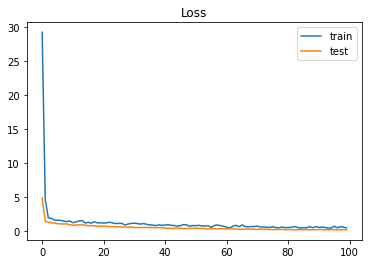

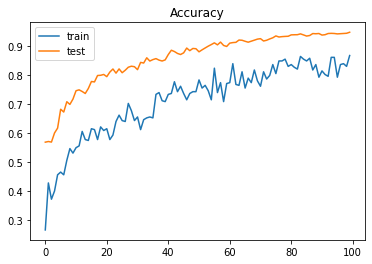

In [74]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# Criando graficos para visualização dos resultados
print()
print()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Matriz de confusão e acurácia por classes
---

----------------CLASSIFICATION--------------
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.91      0.94      1032
           3       0.97      0.90      0.93      1010
           4       0.95      0.97      0.96       982
           5       0.95      0.93      0.94       892
           6       0.97      0.97      0.97       958
           7       0.97      0.93      0.95      1028
           8       0.97      0.83      0.90       974
           9       0.97      0.88      0.93      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

----------------Matrix de Confusão--------------


<AxesSubplot:>

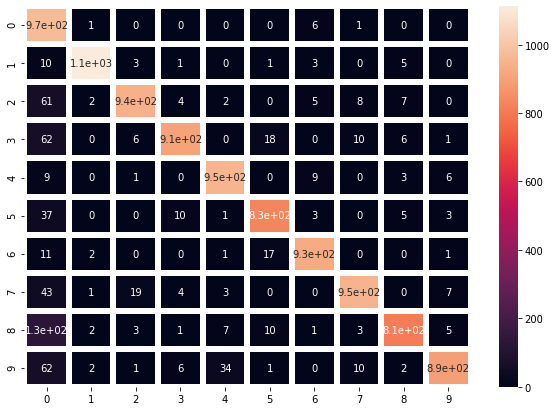

In [75]:
predictions = model.predict(x_test)
y_pred = (predictions > 0.5)
classification = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('----------------CLASSIFICATION--------------')
print(classification)
print('----------------Matrix de Confusão--------------')
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(matrix, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=5.0)